In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
sigma1 = 10
sigma2 = 40
n = 2000000
x1_e1 = sigma1 * np.random.randn(n,1)
y_e1 = x1_e1 + (sigma1 * np.random.rand(n,1))
x2_e1 = y_e1 + np.random.randn(n,1)

x1_e2 = sigma2 * np.random.randn(n,1)
y_e2 = x1_e2 + (sigma2 * np.random.rand(n,1))
x2_e2 = y_e2 + np.random.randn(n,1)

max_val = max(max(x1_e1), max(y_e1), max(x2_e1), max(x1_e2), max(y_e2), max(x2_e2)) + 1
min_val = min(min(x1_e1), min(y_e1), min(x2_e1), min(x1_e2), min(y_e2), min(x2_e2)) - 1

(array([-193.24486094]), array([240.60712259]))

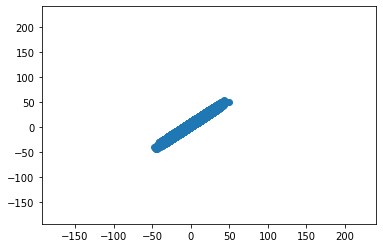

In [166]:
plt.scatter(x1_e1,y_e1)
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

(array([-193.24486094]), array([240.60712259]))

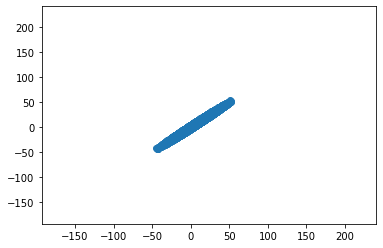

In [167]:
plt.scatter(x2_e1,y_e1)
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

(array([-193.24486094]), array([240.60712259]))

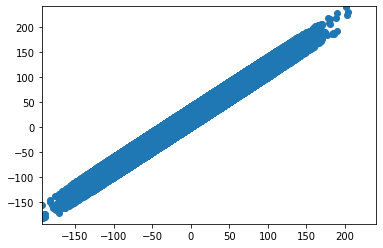

In [168]:
plt.scatter(x1_e2,y_e2)
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

(array([-193.24486094]), array([240.60712259]))

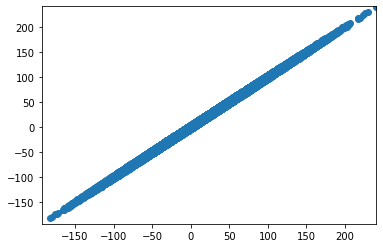

In [169]:
plt.scatter(x2_e2,y_e2)
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

## Regressions

In [170]:
import numpy as np
from sklearn.linear_model import LinearRegression
regx1_e1 = LinearRegression().fit(x1_e1, y_e1)
regx1_e1.score(x1_e1, y_e1), regx1_e1.coef_

(0.9230837771791828, array([[1.00012592]]))

In [171]:
regx2_e1 = LinearRegression().fit(x2_e1, y_e1)
regx2_e1.score(x2_e1, y_e1), regx2_e1.coef_

(0.9908721703118689, array([[0.9909013]]))

In [172]:
x1x2_e1 = np.concatenate((x1_e1,x2_e1), axis=1)
regx1x2_e1 = LinearRegression().fit(x1x2_e1, y_e1)
regx1x2_e1.score(x1x2_e1, y_e1), regx1x2_e1.coef_

(0.9917705651627421, array([[0.10682185, 0.89320373]]))

In [173]:
regx1_e2 = LinearRegression().fit(x1_e2, y_e2)
regx1_e2.score(x1_e2, y_e2), regx1_e2.coef_

(0.923157227980598, array([[0.99987819]]))

In [174]:
regx2_e2 = LinearRegression().fit(x2_e2, y_e2)
regx2_e2.score(x2_e2, y_e2), regx2_e2.coef_

(0.9994230162231139, array([[0.99942311]]))

In [176]:
x1x2_e2 = np.concatenate((x1_e2,x2_e2), axis=1)
regx1x2_e2 = LinearRegression().fit(x1x2_e2, y_e2)
regx1x2_e2.score(x1x2_e2, y_e2), regx1x2_e2.coef_

(0.9994269545122234, array([[0.00742462, 0.99257212]]))

## This is the key line: 
### the regression coefficient for x1 remains more stable than for x2

Perhaps we need statistical significance test of some sort to verify this, but essentially, does this show that you can indeed expect to see such stability even if you don't know the data generation process, simply by inspecting your results from fitting linear regression? (this is of course a toy example)

In [177]:
abs(regx1_e1.coef_ - regx1_e2.coef_), abs(regx2_e1.coef_ - regx2_e2.coef_) 

(array([[0.00024773]]), array([[0.00852181]]))